<a href="https://colab.research.google.com/github/Krithika26092002/ML-Projects/blob/main/Stock_Market_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Market Performance Analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))
dataset = pd.read_csv(filename)

Saving stocks.csv to stocks (1).csv


In [ ]:
dataset.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


<Axes: >

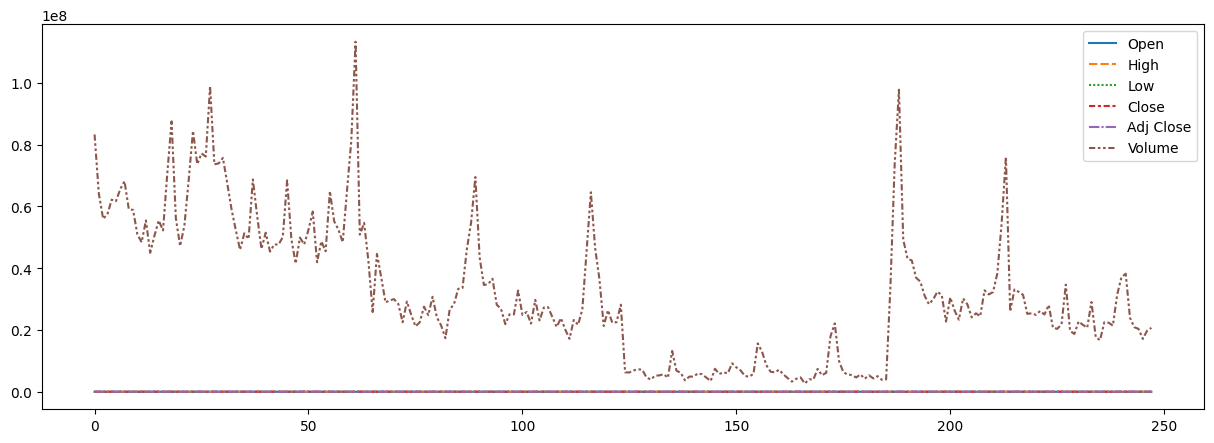

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(data=dataset)

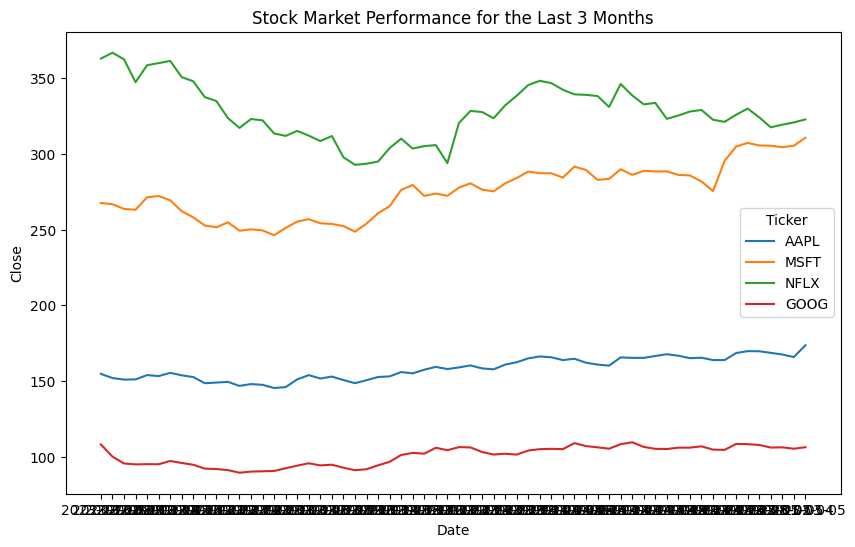

In [ ]:
# Create line plot using matplotlib.pyplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='Date', y='Close', hue='Ticker')

# Set plot title and axes labels
plt.title("Stock Market Performance for the Last 3 Months")
plt.xlabel("Date")
plt.ylabel("Close")

# Show the plot
plt.show()

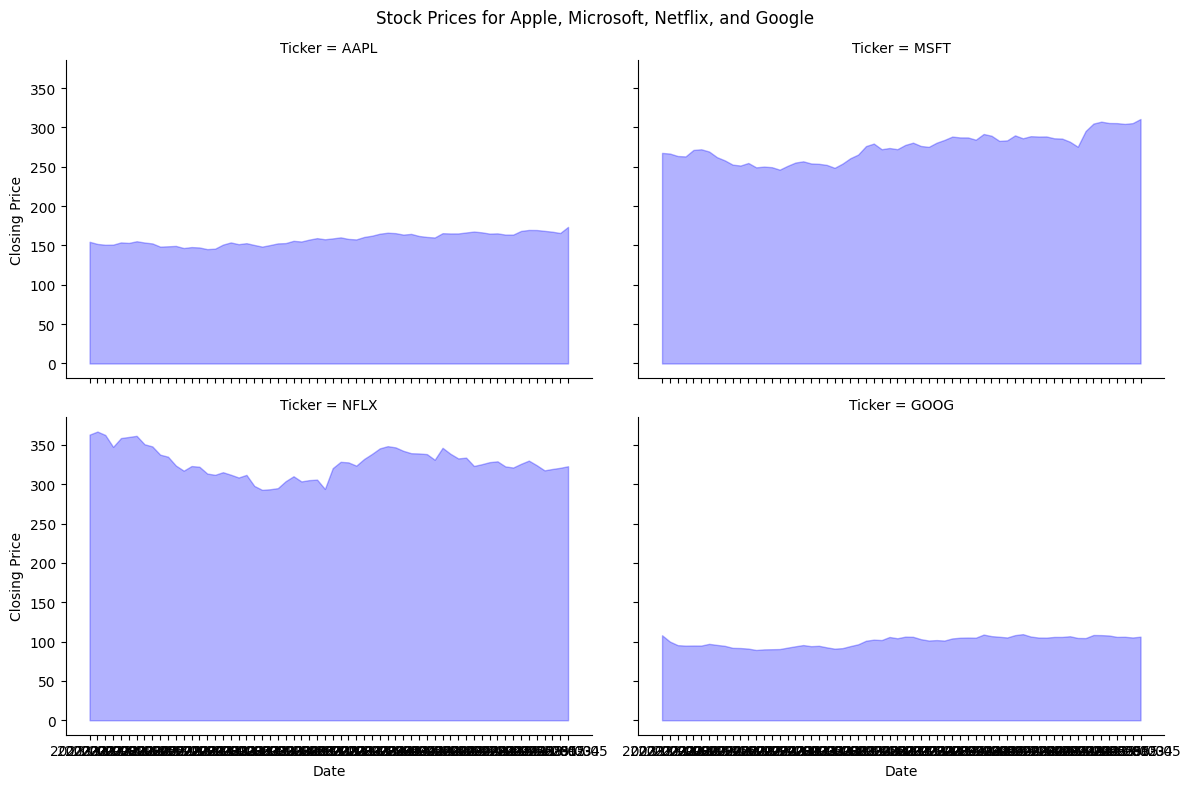

In [ ]:
# Create facet grid
g = sns.FacetGrid(dataset, col='Ticker', col_wrap=2, height=4, aspect=1.5)

# Iterate over each facet and plot area chart
for ticker, ax in zip(dataset['Ticker'].unique(), g.axes):
    data = dataset[dataset['Ticker'] == ticker]
    ax.fill_between(data['Date'], data['Close'], color='blue', alpha=0.3)

# Set plot title and axes labels
g.fig.suptitle('Stock Prices for Apple, Microsoft, Netflix, and Google')
g.set_axis_labels('Date', 'Closing Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG']

In [ ]:
dataset['MA10'] = dataset.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
dataset['MA20'] = dataset.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in dataset.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
          MA10      MA20
0          NaN       NaN
1          NaN       NaN
2          NaN       NaN
3          NaN       NaN
4          NaN       NaN
..         ...       ...
57  166.631000  165.2730
58  166.837999  165.3915
59  166.819998  165.4825
60  166.733998  165.5840
61  167.588998  166.0295

[62 rows x 2 columns]
Moving Averages for GOOG
           MA10        MA20
186         NaN         NaN
187         NaN         NaN
188         NaN         NaN
189         NaN         NaN
190         NaN         NaN
..          ...         ...
243  106.209000  106.416500
244  106.295000  106.470000
245  106.405001  106.520000
246  106.336001  106.533001
247  106.366500  106.398750

[62 rows x 2 columns]
Moving Averages for MSFT
           MA10        MA20
62          NaN         NaN
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
..          ...         ...
119  291.889999  289.487000
120  293.594000  29

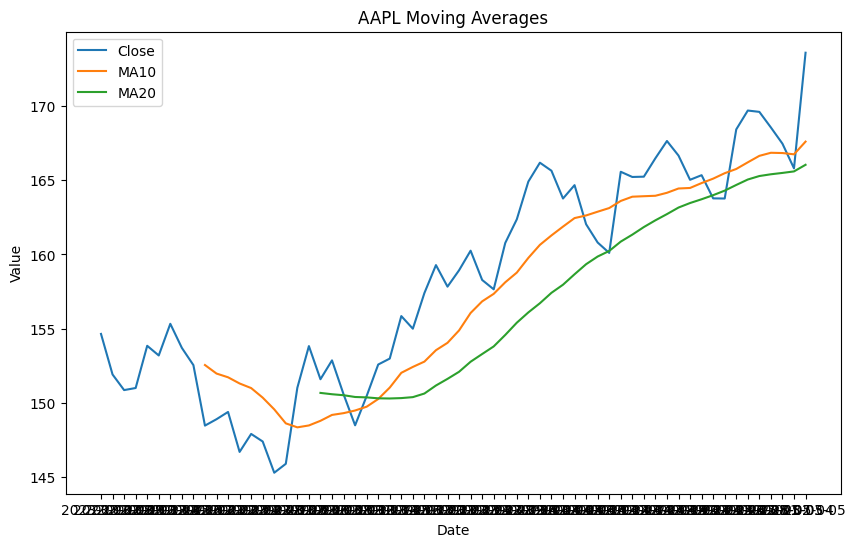

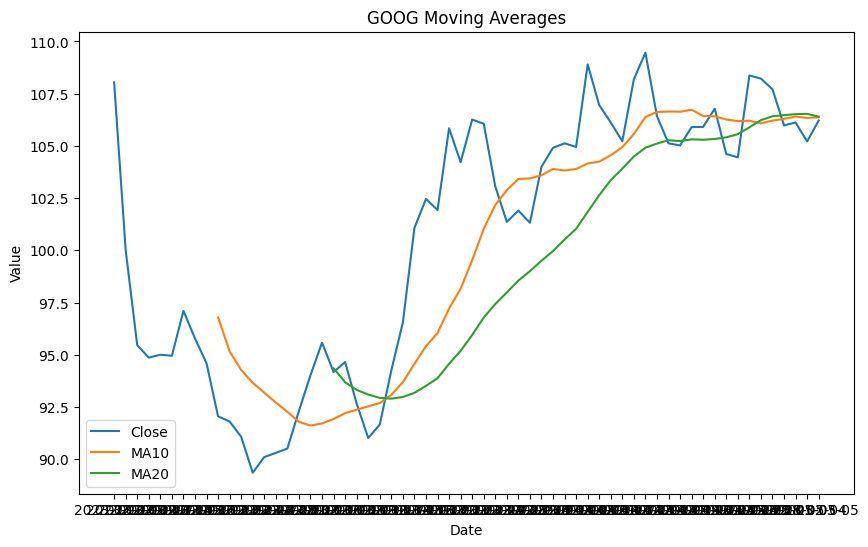

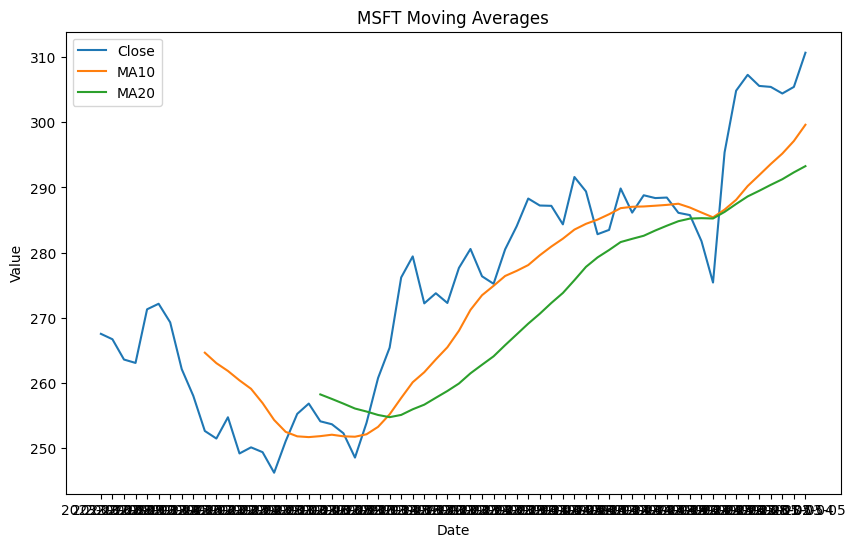

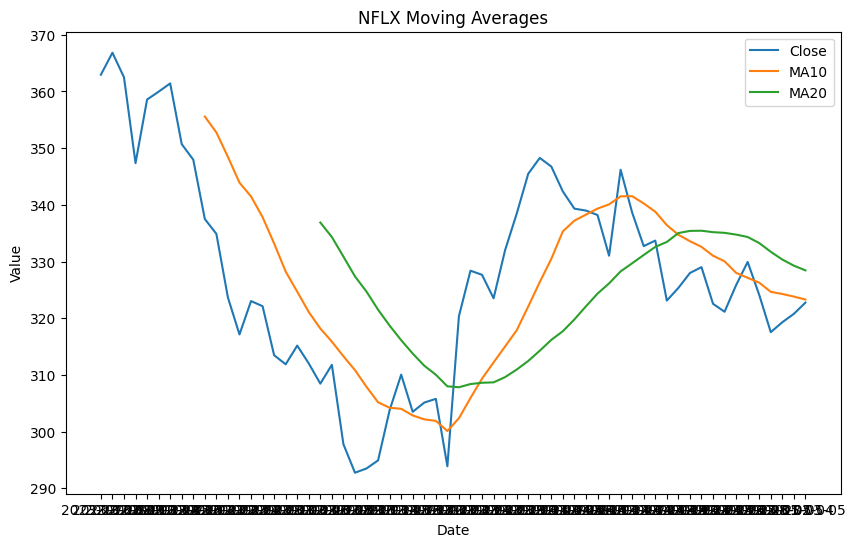

In [ ]:
# Iterate over each ticker group
for ticker, group in dataset.groupby('Ticker'):
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=group, x='Date', y='Close', label='Close')
    sns.lineplot(data=group, x='Date', y='MA10', label='MA10')
    sns.lineplot(data=group, x='Date', y='MA20', label='MA20')

    # Set plot title and axes labels
    plt.title(f'{ticker} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Value')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

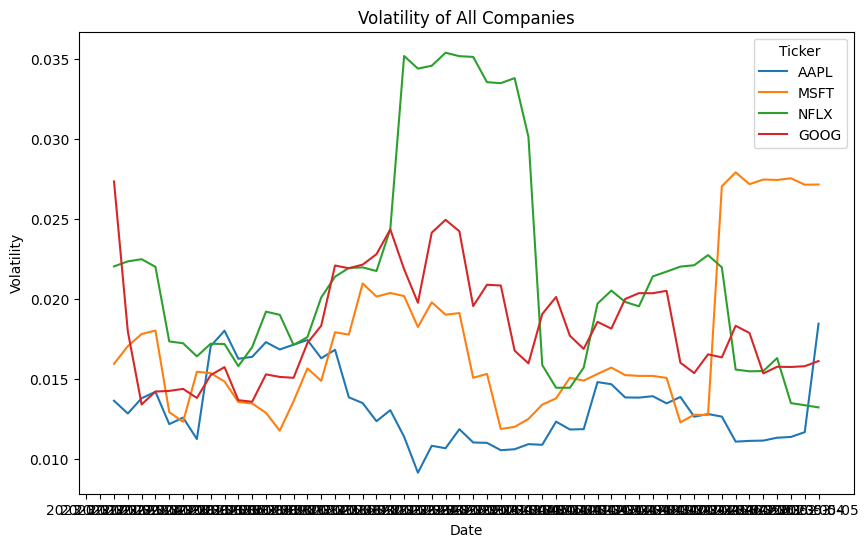

In [ ]:
# Calculate volatility using rolling window
dataset['Volatility'] = dataset.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Create line plot using matplotlib.pyplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='Date', y='Volatility', hue='Ticker')

# Set plot title and axes labels
plt.title('Volatility of All Companies')
plt.xlabel('Date')
plt.ylabel('Volatility')

# Show the plot
plt.show()

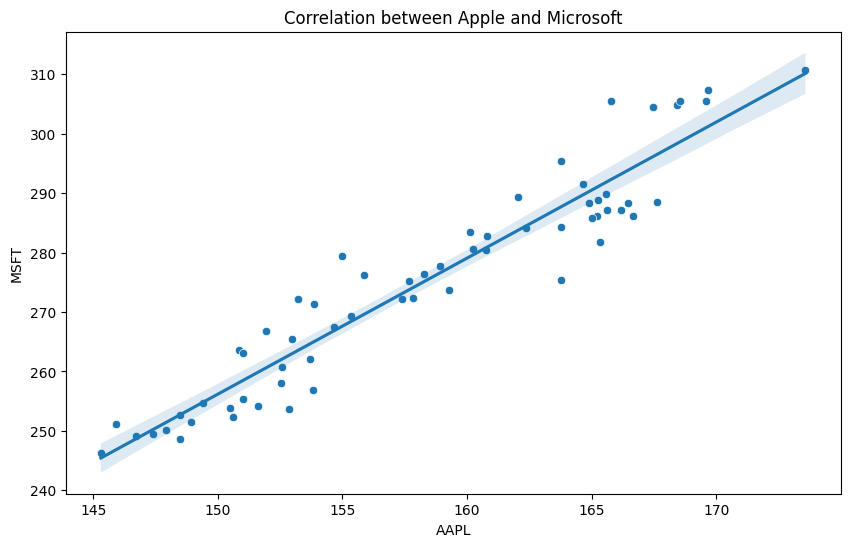

In [ ]:
# Create DataFrame for Apple and Microsoft stock prices
apple = dataset.loc[dataset['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = dataset.loc[dataset['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})

# Merge the DataFrames based on 'Date'
dataset_corr = apple.merge(microsoft, on='Date')

# Create scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_corr, x='AAPL', y='MSFT')

# Add trendline using seaborn's regplot
sns.regplot(data=dataset_corr, x='AAPL', y='MSFT', scatter=False)

# Set plot title and axes labels
plt.title('Correlation between Apple and Microsoft')
plt.xlabel('AAPL')
plt.ylabel('MSFT')

# Show the plot
plt.show()

There is a strong linear relationship between the stock prices of Apple and Microsoft, which means that when the stock price of Apple increases, the stock price of Microsoft also tends to increase. It is a sign of a strong correlation or similarity between the two companies, which can be due to factors such as industry trends, market conditions, or common business partners or customers.

Stock Market Performance Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis and analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies.